In [185]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from plotly import express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


# **Import**

In [186]:
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [187]:
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')

* **Rank - Ranking of overall sales.**
* **Name - The games name.**
* **Platform - Platform of the games release. (i.e. PC,PS4, etc.)**
* **Year - Year of the game's release.**
* **Genre - Genre of the game.**
* **Publisher - Publisher of the game.**
* **NA_Sales - Sales in North America (in millions).**
* **EU_Sales - Sales in Europe (in millions).**
* **JP_Sales - Sales in Japan (in millions).**
* **Other_Sales - Sales in the rest of the world (in millions).**
* **Global_Sales - Total worldwide sales.**

In [188]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [189]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [191]:
df.shape

(16598, 11)

In [192]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

**Remove missing values**

In [193]:
df = df.dropna()
df.shape

(16291, 11)

# **2. Data Visualization**

# Histogram Check

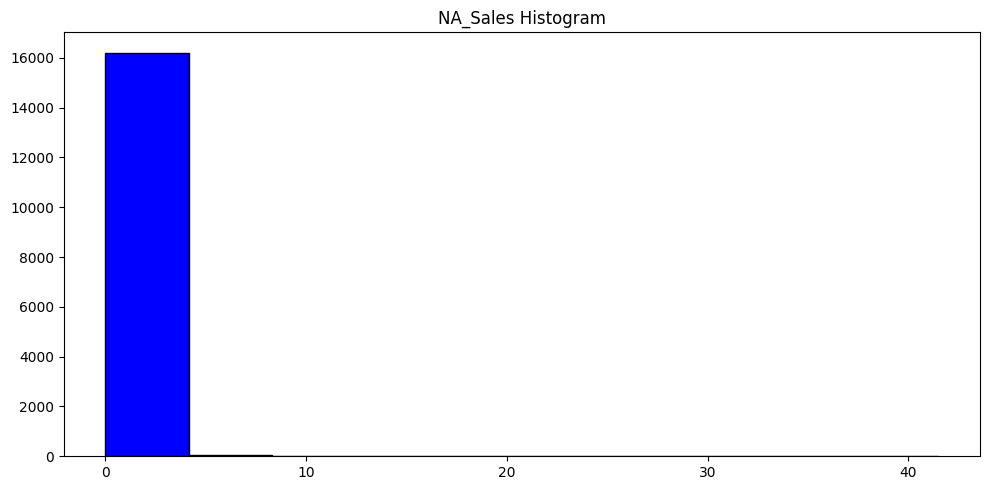

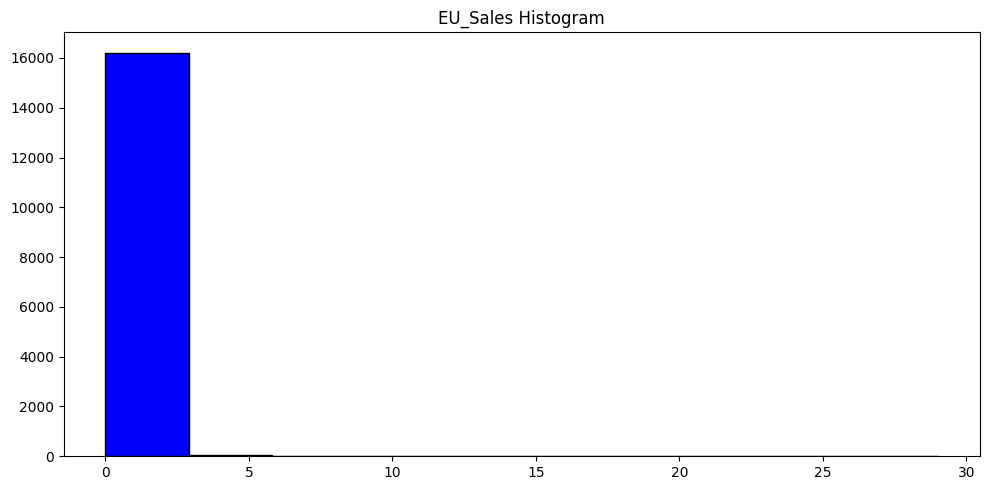

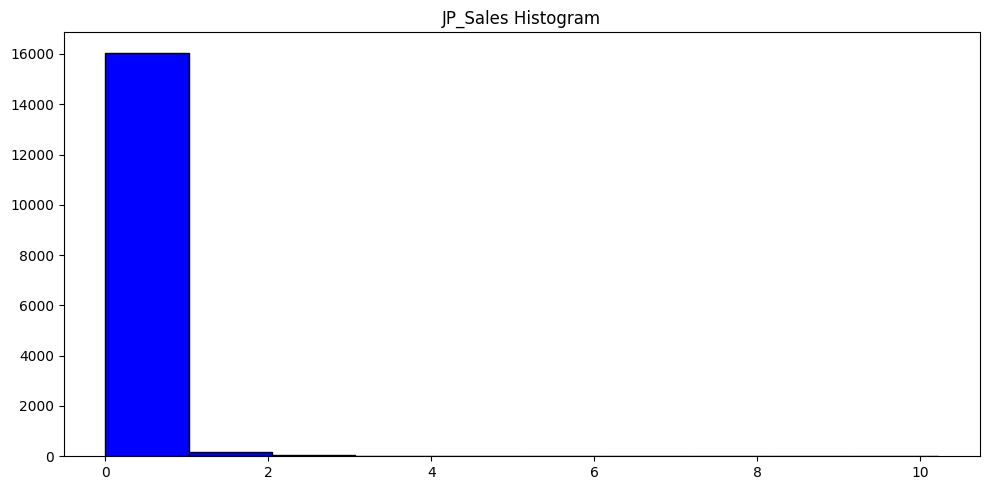

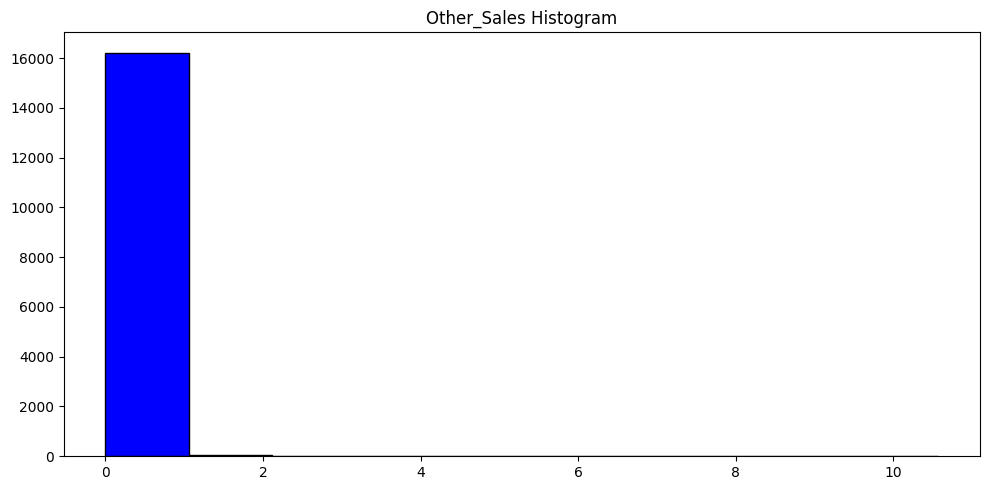

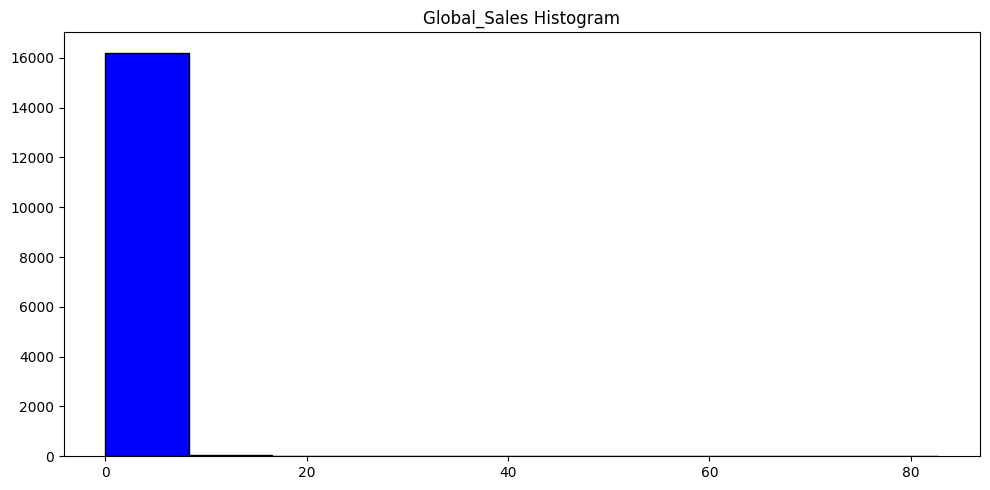

In [194]:
cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
for i in cols:
    plt.figure(figsize=(10,5))
    plt.hist(df[i], bins=10, color='blue', edgecolor='black')
    plt.title(f'{i} Histogram')
    plt.tight_layout()
    plt.show()

-----------------------------------------

**Correlation Heatmap**

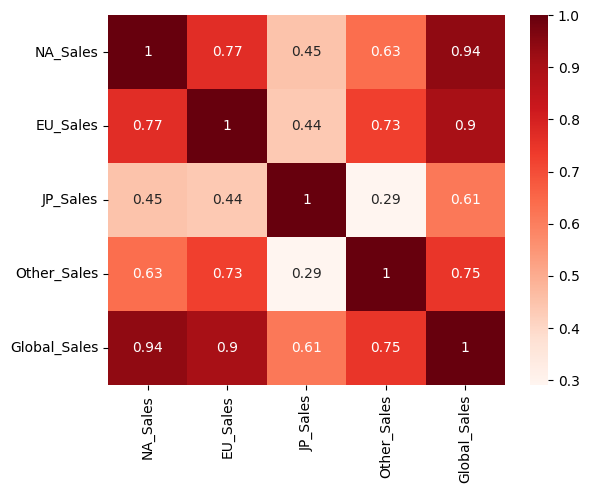

In [195]:
sns.heatmap(df[cols].corr(),annot=True,cmap='Reds')
plt.show()

---------------------------

# Count by Genre

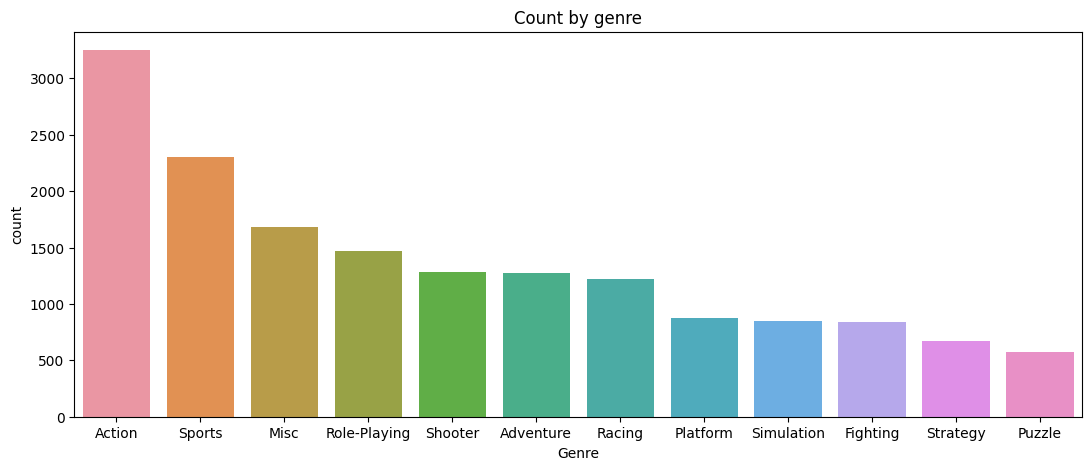

In [196]:
plt.figure(figsize=(13,5))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.title('Count by genre')
plt.show()

--------------------

# Sales by genre each region

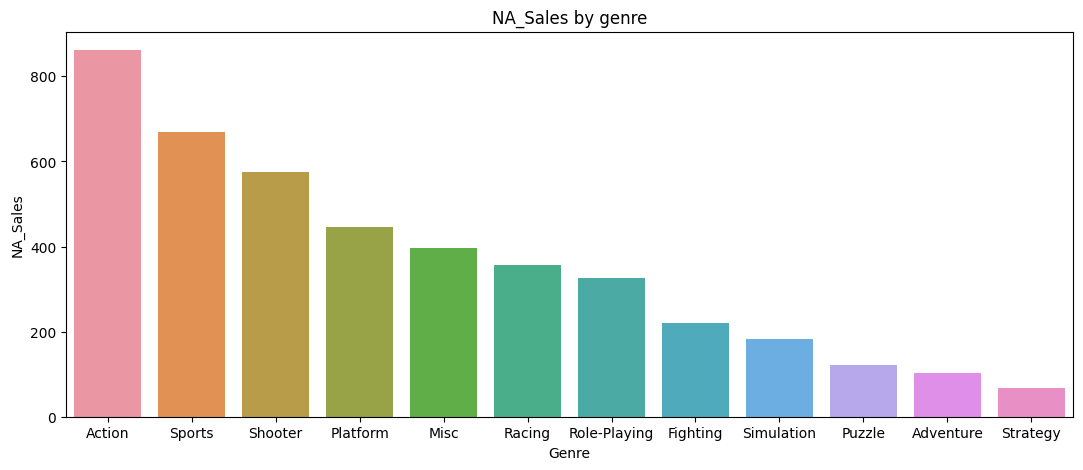

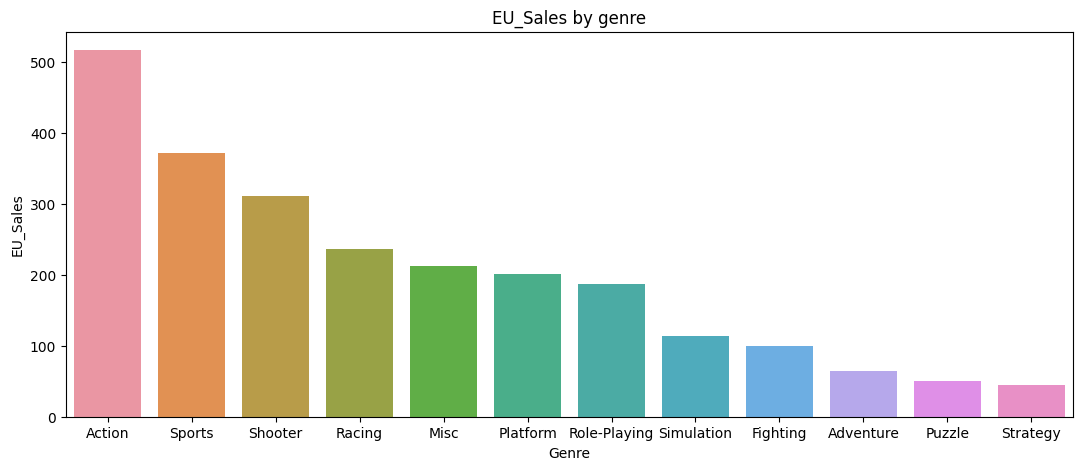

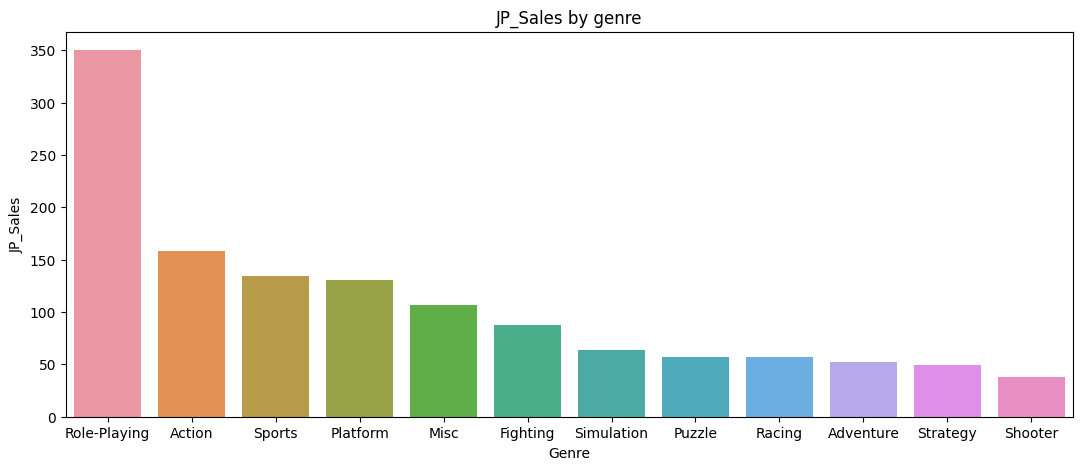

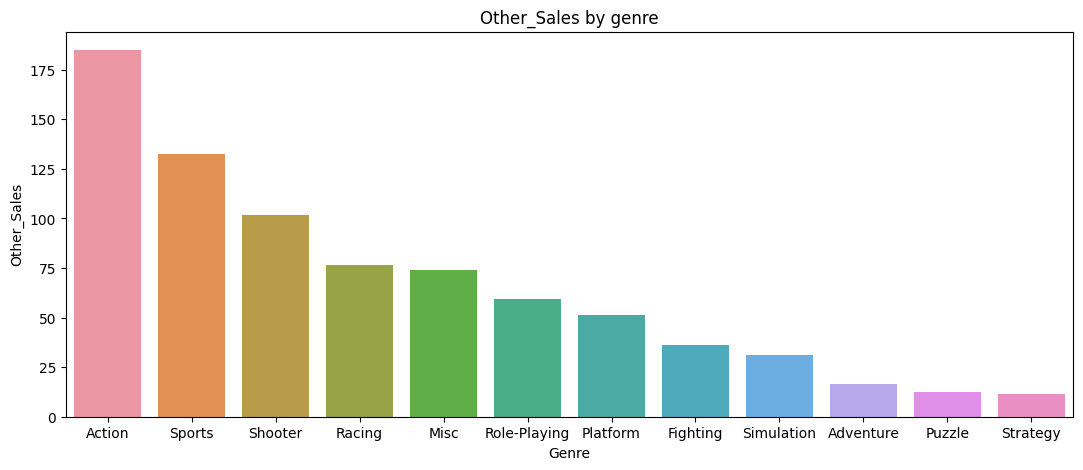

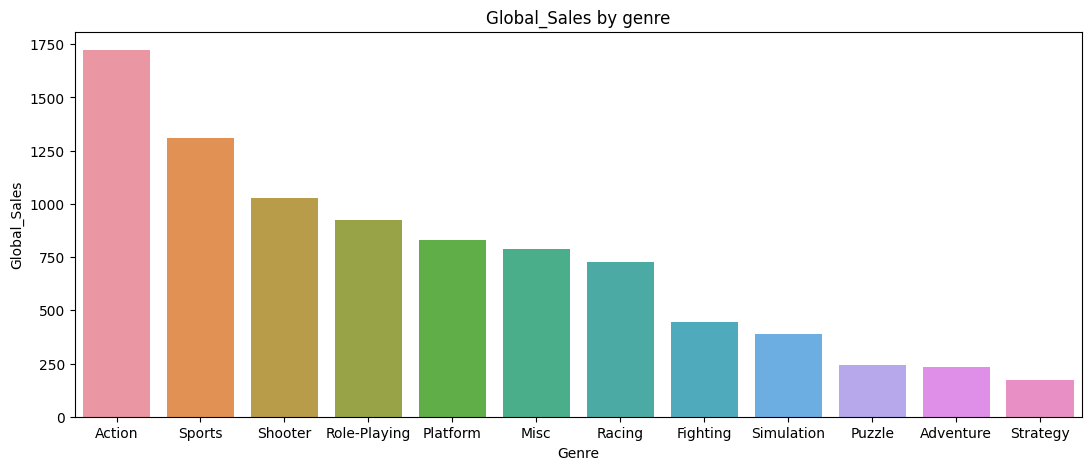

In [197]:
Sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

for i in Sales:
    Genre_Sales = df.groupby('Genre')[i].sum().sort_values(ascending=False)
    plt.figure(figsize=(13,5))
    sns.barplot(data = df, x= Genre_Sales.index ,y = Genre_Sales)
    plt.title(f'{i} by genre')
    plt.show()

**The action genre has the highest sales volume.**\
**Usually, the genre with the least sales is strategy.**\
**Global_Sales are the combined sales of each sales volume.**

---------------------------

# Golobal_Sales by year

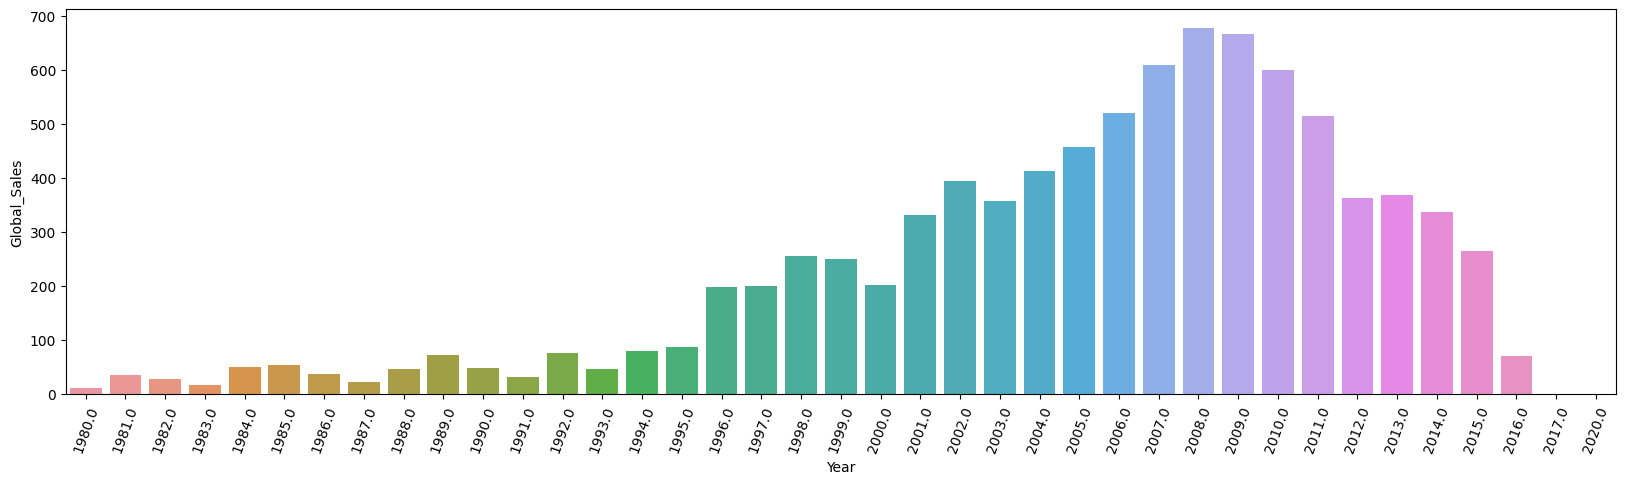

In [198]:
TopSales_year = df.groupby('Year')['Global_Sales'].sum()


plt.figure(figsize=(20,5))
sns.barplot(data = df, x= TopSales_year.index, y= TopSales_year)

plt.xticks(rotation=70)
plt.show()

**Global_Sales was the highest in 2008.**

--------------------------------------------------------

# Global_Sales by Platform

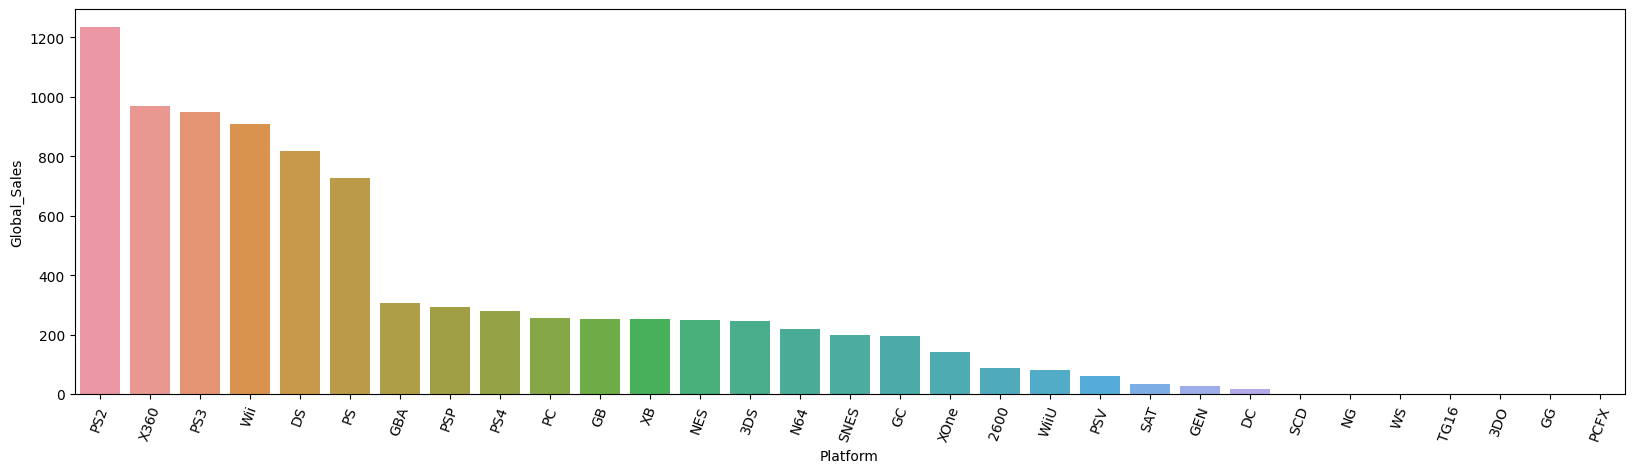

In [199]:
TopSales_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(data = df, x= TopSales_platform.index, y= TopSales_platform)
plt.xticks(rotation=70)
plt.show()

**PS2 has the highest Global_Sales.**

--------------

# Global_Sales by Publisher

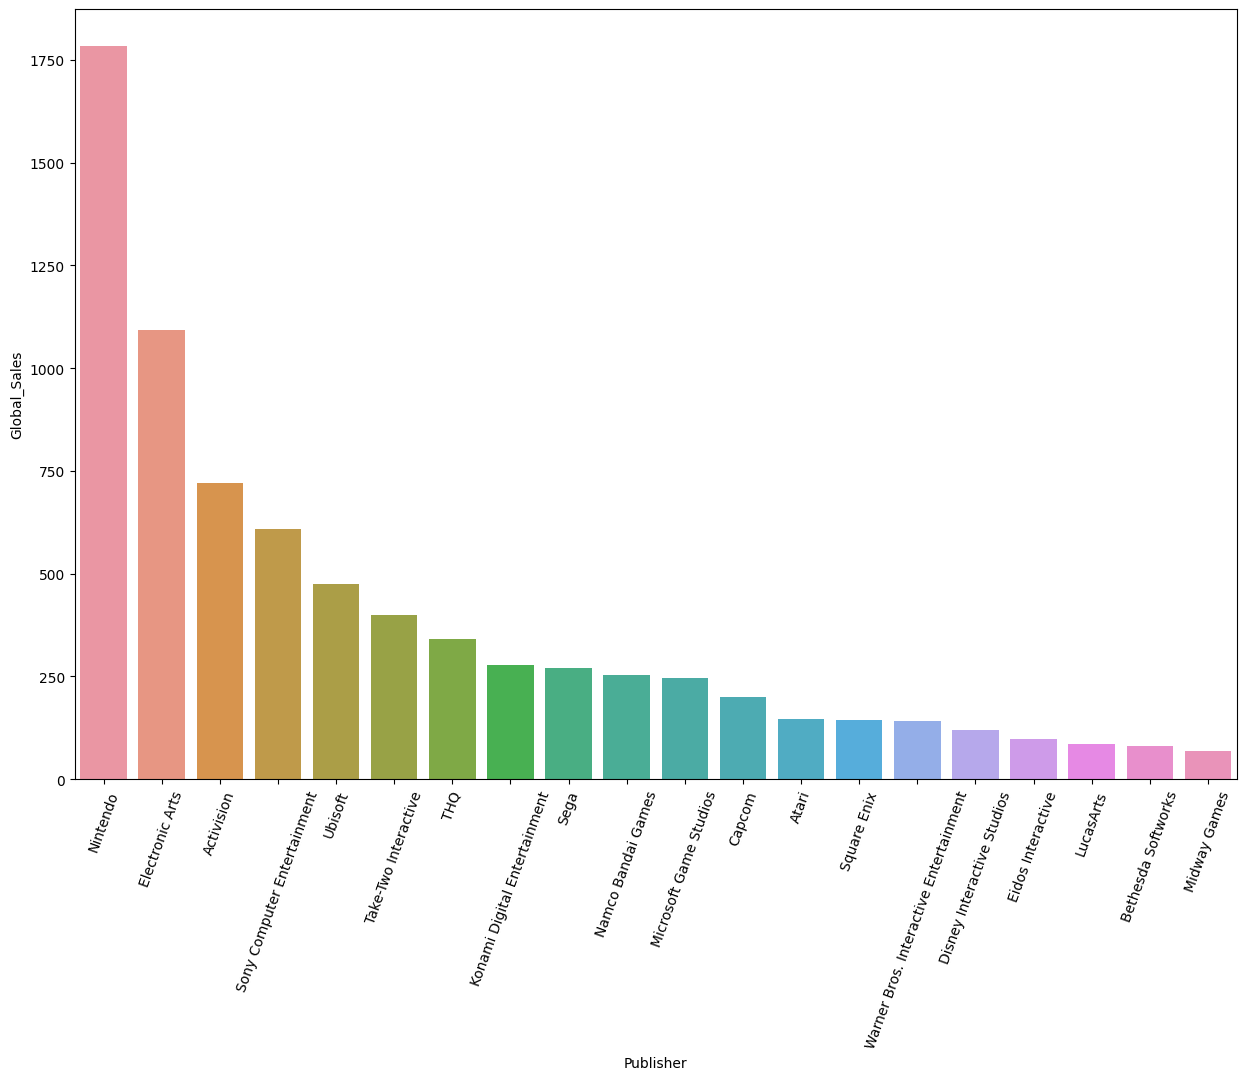

In [200]:
TopSales_Publisher = df[['Publisher', 'Global_Sales']]
TopSales_Publisher = TopSales_Publisher.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
TopSales_Publisher = pd.DataFrame(TopSales_Publisher).reset_index()


plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=TopSales_Publisher)
plt.xticks(rotation=70)
plt.show()

**Nintendo's Global_Sales is the highest**

-----------

# Change in Global_Sales volume of Nintendo

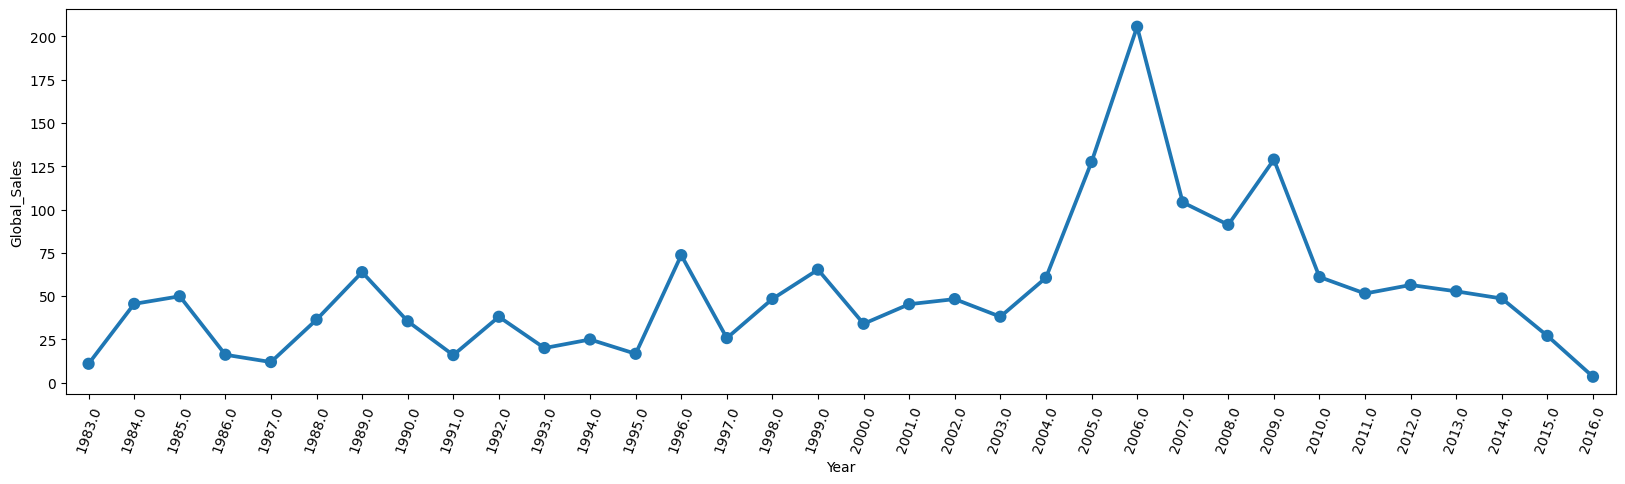

In [201]:
nintendo = df[df['Publisher'] == "Nintendo"]

nintendo_Sales_year = nintendo.groupby('Year')['Global_Sales'].sum()


plt.figure(figsize=(20,5))
sns.pointplot(data = nintendo, x= nintendo_Sales_year.index, y= nintendo_Sales_year)

plt.xticks(rotation=70)
plt.show()

**Nintendo had the highest sales in 2006.**

-----------------------

# **3. Modeling**

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [203]:
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

y = df['Global_Sales']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

In [205]:
md_lr = LinearRegression()

md_lr.fit(X_train, y_train)

pred_lr = md_lr.predict(X_test)


In [206]:
print(f'MAE : {mean_absolute_error(y_test,pred_lr)}')
print(f'MSE : {mean_squared_error(y_test,pred_lr)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test,pred_lr))}')
print(f'r2_score : {r2_score(y_test,pred_lr)}')

MAE : 0.002898378201323552
MSE : 2.7093926891464477e-05
RMSE : 0.005205182695301336
r2_score : 0.9999930848165356


**MAE : 0.002898378201323552**\
**MSE : 2.7093926891464477e-05**\
**RMSE : 0.005205182695301336**\
**r2_score : 0.9999930848165356**

In [207]:
md_rf = RandomForestRegressor(random_state= 10)

md_rf.fit(X_train, y_train)

pred_rf = md_rf.predict(X_test)


In [208]:
print(f'MAE : {mean_absolute_error(y_test,pred_rf)}')
print(f'MSE : {mean_squared_error(y_test,pred_rf)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test,pred_rf))}')
print(f'r2_score : {r2_score(y_test,pred_rf)}')


MAE : 0.03676813803079469
MSE : 0.6982582020447765
RMSE : 0.8356184548253925
r2_score : 0.8217835461065298


**MAE : 0.03676813803079469**\
**MSE : 0.6982582020447765**\
**RMSE : 0.8356184548253925**\
**r2_score : 0.8217835461065298**

---------------------

**The smaller the MAE and MSE, the better the model, so linear regression is a better model.**